In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Payments-Node2Vec.csv')

# Create a graph representation
G = nx.Graph()
for _, row in data.iterrows():
    sender = row['Sender']
    receiver = row['Receiver']
    amount = row['Amount']

    if not G.has_edge(sender, receiver):
        G.add_edge(sender, receiver, weight=0, count=0)

    G[sender][receiver]['weight'] += amount
    G[sender][receiver]['count'] += 1

# Assign weights to the edges
for u, v, d in G.edges(data=True):
    d['weight'] /= d['count']

# Create an adjacency matrix
adj_matrix = nx.to_numpy_array(G, weight='weight')

# Normalize each row of the adjacency matrix to range (0, 1)
row_sums = adj_matrix.sum(axis=1, keepdims=True)
adj_matrix = adj_matrix / row_sums

# Replace NaN values with 0
adj_matrix = np.nan_to_num(adj_matrix)

# Spectral Embedding
def spectral_embedding(adj_matrix):
    # Compute the diagonal matrix
    D = np.diag(np.sum(adj_matrix, axis=1))

    # Compute the Laplacian matrix
    L = D - adj_matrix

    # Compute the eigenvalues and eigenvectors of the Laplacian matrix
    eigenvalues, eigenvectors = np.linalg.eigh(L)

    # Sort the eigenvalues and eigenvectors in ascending order
    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Return the eigenvectors corresponding to the smallest non-zero eigenvalues
    return eigenvectors[:,:2]

# Perform spectral embedding
embedding = spectral_embedding(adj_matrix)

# Scale the embedded data
scaler = StandardScaler()
scaled_embedding = scaler.fit_transform(embedding)

In [ ]:
# Apply k-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_embedding)

# Identify outliers
outliers = np.where(kmeans.labels_ == 1)[0]

# Print the outliers (fraudulent transactions)
print("Fraudulent Transactions:")
for outlier in outliers:
    sender = list(G.nodes())[outlier]
    print(f"Sender ID: {sender}")
    print(data[data['Sender'] == sender])
    print()

Fraudulent Transactions:
Sender ID: 1103
        Sender  Receiver  Amount
6102      1103      1079   17860
6367      1103      1079   14780
12169     1103      1016  112618
12170     1103      1016   94035
38888     1103      1035  130056
38889     1103      1035  127890
38970     1103      1035  118231
38971     1103      1035  118226
39042     1103      1035  126888
39044     1103      1035  126883
39185     1103      1035  178312
39222     1103      1035  164802
43179     1103      1054   91767
43203     1103      1054  132201
45420     1103      1036  112884
45421     1103      1036  147972
45422     1103      1036  100265
45423     1103      1036  149775
45427     1103      1036  132961
45434     1103      1036  110094
45435     1103      1036  110094
45436     1103      1036   93499
45440     1103      1036  106845
63075     1103      1173    7475
67280     1103      1212  118490
67282     1103      1212  134665
67283     1103      1212  156758
67289     1103      1212   55219
69

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


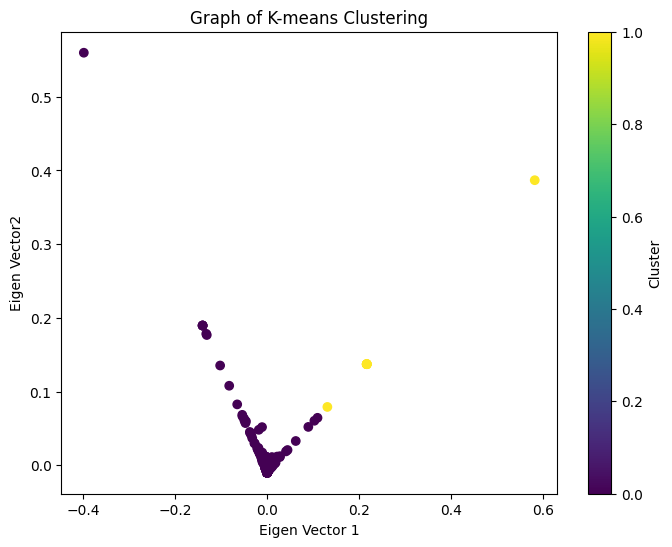

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2-dimensional space for visualization
reduced_embeddings = pca.fit_transform(embedding)

# Plot the PCA graph of k-means clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Eigen Vector 1')
plt.ylabel('Eigen Vector2')
plt.title('Graph of K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_embedding)

# Identify outliers
outliers = np.where((kmeans.labels_ == 1) | (kmeans.labels_ == 2))[0]

# Print the outliers (fraudulent transactions)
print("Fraudulent Transactions:")
for outlier in outliers:
    sender = list(G.nodes())[outlier]
    print(f"Sender ID: {sender}")
    print(data[data['Sender'] == sender])
    print()

Fraudulent Transactions:
Sender ID: 1103
        Sender  Receiver  Amount
6102      1103      1079   17860
6367      1103      1079   14780
12169     1103      1016  112618
12170     1103      1016   94035
38888     1103      1035  130056
38889     1103      1035  127890
38970     1103      1035  118231
38971     1103      1035  118226
39042     1103      1035  126888
39044     1103      1035  126883
39185     1103      1035  178312
39222     1103      1035  164802
43179     1103      1054   91767
43203     1103      1054  132201
45420     1103      1036  112884
45421     1103      1036  147972
45422     1103      1036  100265
45423     1103      1036  149775
45427     1103      1036  132961
45434     1103      1036  110094
45435     1103      1036  110094
45436     1103      1036   93499
45440     1103      1036  106845
63075     1103      1173    7475
67280     1103      1212  118490
67282     1103      1212  134665
67283     1103      1212  156758
67289     1103      1212   55219
69

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


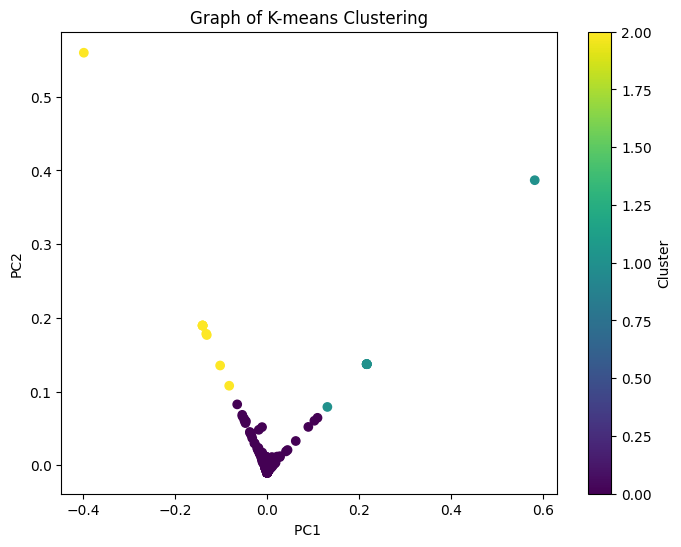

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2-dimensional space for visualization
reduced_embeddings = pca.fit_transform(embedding)

# Plot the PCA graph of k-means clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1 ')
plt.ylabel('PC2')
plt.title('Graph of K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()